In [1]:
import pandas as pd

customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

customer_transactions = pd.merge(customers, transactions, on='CustomerID')

print("Merged Data:")
print(customer_transactions.head())

Merged Data:
  CustomerID      CustomerName         Region  SignupDate TransactionID  \
0      C0001  Lawrence Carroll  South America  10-07-2022        T00015   
1      C0001  Lawrence Carroll  South America  10-07-2022        T00932   
2      C0001  Lawrence Carroll  South America  10-07-2022        T00085   
3      C0001  Lawrence Carroll  South America  10-07-2022        T00445   
4      C0001  Lawrence Carroll  South America  10-07-2022        T00436   

  ProductID   TransactionDate  Quantity  TotalValue   Price  
0      P054  19-01-2024 03:12         2      114.60   57.30  
1      P022  17-09-2024 09:01         3      412.62  137.54  
2      P096  08-04-2024 00:01         2      614.94  307.47  
3      P083  07-05-2024 03:11         2      911.44  455.72  
4      P029  02-11-2024 17:04         3     1300.92  433.64  


In [2]:
customer_features = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'mean',
    'Region': 'first'
}).reset_index()


In [3]:
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=False)

print("Customer Features:")
print(customer_features.head())

Customer Features:
  CustomerID  TotalValue  Quantity  Region_Asia  Region_Europe  \
0      C0001     3354.52  2.400000        False          False   
1      C0002     1862.74  2.500000         True          False   
2      C0003     2725.38  3.500000        False          False   
3      C0004     5354.88  2.875000        False          False   
4      C0005     2034.24  2.333333         True          False   

   Region_North America  Region_South America  
0                 False                  True  
1                 False                 False  
2                 False                  True  
3                 False                  True  
4                 False                 False  


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
customer_features[['TotalValue', 'Quantity']] = scaler.fit_transform(customer_features[['TotalValue', 'Quantity']])

print("Normalized Features:")
print(customer_features.head())

Normalized Features:
  CustomerID  TotalValue  Quantity  Region_Asia  Region_Europe  \
0      C0001    0.308942  0.466667        False          False   
1      C0002    0.168095  0.500000         True          False   
2      C0003    0.249541  0.833333        False          False   
3      C0004    0.497806  0.625000        False          False   
4      C0005    0.184287  0.444444         True          False   

   Region_North America  Region_South America  
0                 False                  True  
1                 False                 False  
2                 False                  True  
3                 False                  True  
4                 False                 False  


In [5]:
from sklearn.cluster import KMeans

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features.iloc[:, 1:])

print("Clustered Data:")
print(customer_features.head())

Clustered Data:
  CustomerID  TotalValue  Quantity  Region_Asia  Region_Europe  \
0      C0001    0.308942  0.466667        False          False   
1      C0002    0.168095  0.500000         True          False   
2      C0003    0.249541  0.833333        False          False   
3      C0004    0.497806  0.625000        False          False   
4      C0005    0.184287  0.444444         True          False   

   Region_North America  Region_South America  Cluster  
0                 False                  True        1  
1                 False                 False        3  
2                 False                  True        1  
3                 False                  True        1  
4                 False                 False        3  


In [6]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

db_index = davies_bouldin_score(customer_features.iloc[:, 1:-1], customer_features['Cluster'])
print('Davies-Bouldin Index ',db_index)

silhouette_avg = silhouette_score(customer_features.iloc[:, 1:-1], customer_features['Cluster'])
print("Silhouette Score ",silhouette_avg)

Davies-Bouldin Index  0.31505941242561775
Silhouette Score  0.7840601295128129


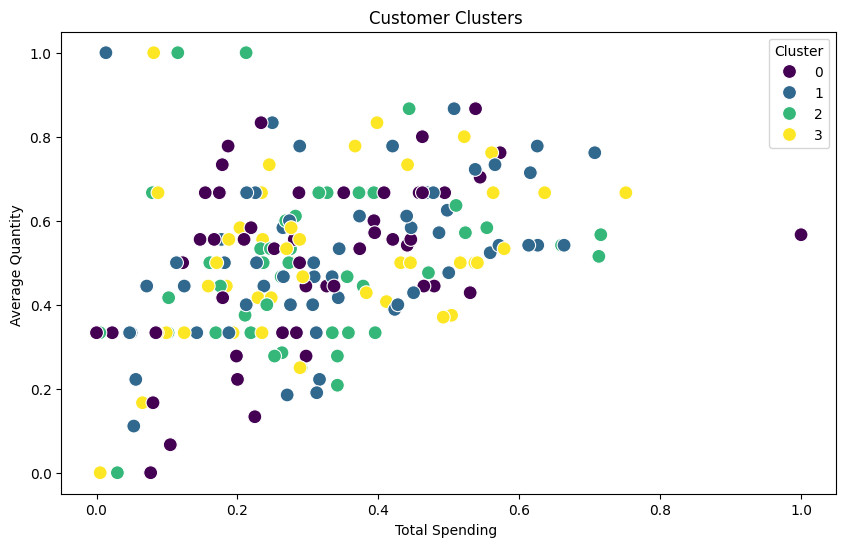

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_features,
    x='TotalValue',
    y='Quantity',
    hue='Cluster',
    palette='viridis',
    s=100
)
plt.title('Customer Clusters ')
plt.xlabel('Total Spending ')
plt.ylabel('Average Quantity ')
plt.show()

In [8]:
cluster_summary = customer_features.groupby('Cluster').agg({
    'TotalValue': 'mean',
    'Quantity': 'mean',
    'Region_Europe': 'mean',
    'Region_North America': 'mean',
    'Region_South America': 'mean',
    'Region_Asia': 'mean'
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
   Cluster  TotalValue  Quantity  Region_Europe  Region_North America  \
0        0    0.306163  0.505701            1.0                   0.0   
1        1    0.343245  0.526067            0.0                   0.0   
2        2    0.304848  0.488982            0.0                   1.0   
3        3    0.318547  0.516513            0.0                   0.0   

   Region_South America  Region_Asia  
0                   0.0          0.0  
1                   1.0          0.0  
2                   0.0          0.0  
3                   0.0          1.0  
